In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
data = np.loadtxt("simulation.txt")
data_exp = np.loadtxt("data.txt")

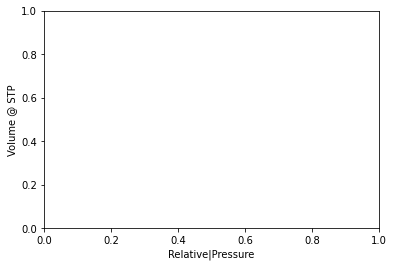

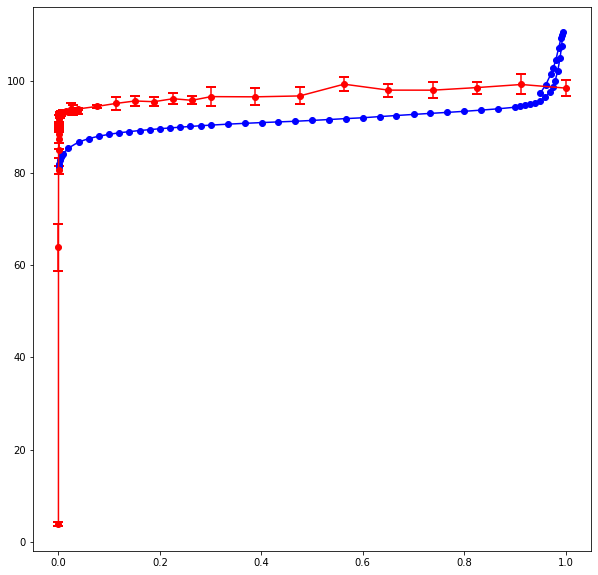

In [5]:
p, a, err = np.split(data, 3, axis=1)
p_exp,a_exp = np.split(data_exp, 2, axis=1)
p = p / p[-1]
plt.ylabel('Volume @ STP')
plt.xlabel('Relative|Pressure')
a_max = np.argmax(a)
plt.figure(figsize=(10,10))
N = 60
plt.errorbar(p.reshape(-1)[:N], a.reshape(-1)[:N], yerr=err.reshape(-1)[:N], marker='o', c='r', capsize=5, capthick=2)
plt.plot(p_exp[:N], a_exp[:N], marker='o', c='b')
plt.show()

C:\Users\anton\AppData\Local\Temp\ipykernel_4680\3374453731.py:2: RuntimeWarning: divide by zero encountered in true_divide
  new_y = p/(a*(1-p))


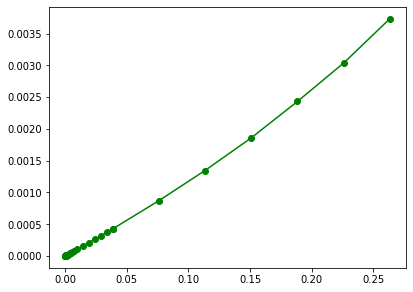

In [5]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
new_y = p/(a*(1-p))
N = 30
plt.plot(p[0:N], new_y[0:N], marker='o', c='g')
plt.show()

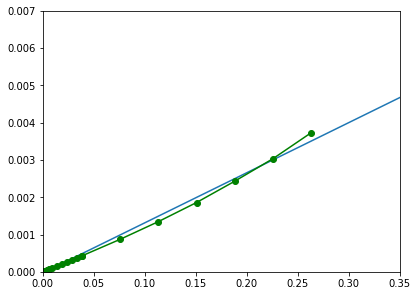

Line 0.013446067336555961*x + -3.298581444253037e-05
R value 0.9950640722732561


In [6]:
def lin_reg(N0, N):
    model = LinearRegression()
    model.fit(p[N0:N], new_y[N0:N])
    r = model.score(p[N0:N], new_y[N0:N])
    k = model.coef_[0][0]
    b = model.intercept_[0]
    return k, b, r
k, b, r = lin_reg(0, N)
plt.xlim(0, 0.35)
plt.ylim(0, 0.007)
plt.plot([0, 1], [b, k + b], marker = 'o')
plt.plot(p[0:N], new_y[0:N], marker='o', c='g')
plt.show()
print(f"Line {k}*x + {b}")
print(f"R value {r}")

In [7]:
def calc_consts(k, b):
    c = k/b + 1
    am = 1 / (b*c) /22.4*10**-3
    Na =  6.022140 * (10**23)
    wm = 16.2 * (10**-20)
    As = Na * am * wm
    return am, c, As
am, c, As = calc_consts(k, b)
print(f"A = {As}")
print(f"Am = {am}\nC = {c}")

A = 324.7052268631247
Am = 0.003328307299799591
C = -406.63181275946397


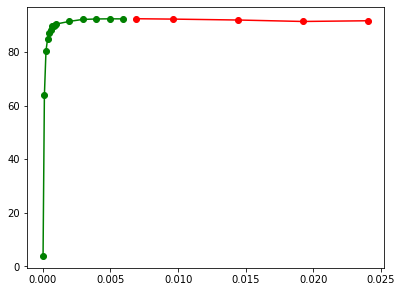

P/P0 max = [0.00690471]


In [8]:
P0 = 1
Rokkel_y = a * P0 * (1 - p)
Rokkel_y_max = np.argmax(Rokkel_y)
plt.plot(p[:Rokkel_y_max], Rokkel_y[:Rokkel_y_max], marker='o', c='g')
plt.plot(p[Rokkel_y_max:20], Rokkel_y[Rokkel_y_max:20], marker='o', c='r')
plt.show()
print(f"P/P0 max = {p[Rokkel_y_max]}")

№1)/n
Line 0.010594480700994509*x + 9.116829711086517e-07
As = 411.0558175422039 c = 11621.79476828562
№2)/n
Line 0.010745476274625014*x + 3.554997567346823e-07
As = 405.30112233419976 c = 30227.395577099123
№3)/n
Line 0.010754710586704071*x + 3.2044363774595496e-07
As = 404.9544502739577 c = 33562.9413833715
№4)/n
Line 0.010757912745663368*x + 3.0785957112519744e-07
As = 404.83439021991484 c = 34945.22052997807
№5)/n
Line 0.010760575796762527*x + 2.9704388278018894e-07
As = 404.73461057181765 c = 36226.5424890379
№6)/n
Line 0.010762240921973205*x + 2.900692237772898e-07
As = 404.67225433624907 c = 37103.31916997948
№7)/n
Line 0.010764478216912477*x + 2.804286506438639e-07
As = 404.5885116399278 c = 38386.80042444752
№8)/n
Line 0.010763191647925045*x + 2.861143799102168e-07
As = 404.6366587780973 c = 37619.49247599004
№9)/n
Line 0.010764467938462929*x + 2.8035086105627035e-07
As = 404.5889008747958 c = 38397.41475651594
№10)/n
Line 0.010765818982961889*x + 2.741800193382875e-07
As = 40

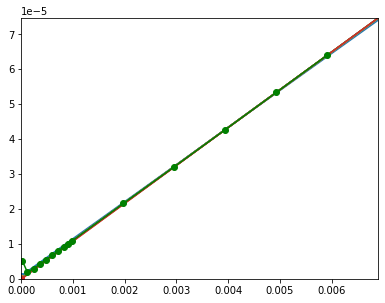

In [11]:
plt.xlim(0, p[Rokkel_y_max])
plt.ylim(0, new_y[Rokkel_y_max])
for i, p_min in enumerate(p[:Rokkel_y_max-1]):
    k, b, r = lin_reg(i, Rokkel_y_max)
    am, c, As = calc_consts(k, b)
    plt.plot([0, 1], [b, k + b], marker = 'o')
    print(f"№{i+1})/n")
    print(f"Line {k}*x + {b}")
    print(f"As = {As} c = {c}")

plt.plot(p[:Rokkel_y_max], new_y[:Rokkel_y_max], marker='o', c='g')
plt.show()

In [ ]:
a0 = 27.1667
a1 = 23.4490
a2 = 16.7500
a3 = 6.5135
a4 = 0.9971
a5 = 0
b = np.log(p)
compare_y = a0 + a1*b + a2*(b**2) + a3*(b**3) + a4*(b**4) + a5*(b**5)
am = (a/22.4)*10**3 # sorb in mole/g
model = LinearRegression()
model.fit(compare_y[12:23], am[12:23])
r = model.score(compare_y[12:23], am[12:23])
k = model.coef_[0][0]
b = model.intercept_[0]

print(f"a_micro = {b} (моль/g)")
print(f"S = {k} (м^2/g)")

plt.plot(compare_y[12:23], am[12:23], marker='o', c='r')
plt.show()

In [ ]:
dens_N = 0.808 # g(adsorb)/cm^3
mol_mass_N2 = 28 # g(adsorb)/mole
V = b * mol_mass_N2 * 10 **-6 / dens_N # cm^3/g(adsorb)
print(V)

In [ ]:
N = 25
M = 50
print()
am = a/22.4*10**3 # sorb in mole/g
a_ln = np.log(am)
BETA = 0.33
T = 77 # K
R = 8.31446 # Дж/(моль∙К)
A_sqr = (-R*T*np.log(p))**2
model = LinearRegression()
model.fit(A_sqr[N:M], a_ln[N:M])
r = model.score(A_sqr[N:M], a_ln[N:M])
print(r)
k = model.coef_[0][0]
b = model.intercept_[0]

b = np.exp(b)

dens_N = 0.808 # g(adsorb)/cm^3
mol_mass_N2 = 28 # g(adsorb)/mole
V = b * mol_mass_N2 * 10 **-6 / dens_N # cm^3/g(adsorb)
E0 = np.sqrt(1/((BETA**2)*(-k))) / 10**3 # кДж
R = 14.8/E0 # нм
print(V, "cm^3")
print(E0, "кДж")
print(R, "нм")
plt.plot(A_sqr[N:M], a_ln[N:M], marker='o', c='r')
